In [1]:
import pandas as pd
import numpy as np
from sklearn.cross_validation  import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import seaborn as sns
import pandas_profiling
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\HP\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\HP\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\HP\Anaconda3\lib\runpy.py", line 85, in _run_code
    

In [2]:
iris_data = pd.read_csv('Iris.csv') #reading the csv file
iris_data.head() #printing first 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#converting dtabular data to html page
report = pandas_profiling.ProfileReport(iris_data)
report.to_file("iris_data.html")

In [4]:
iris_data.corr() #correlation columnwise

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


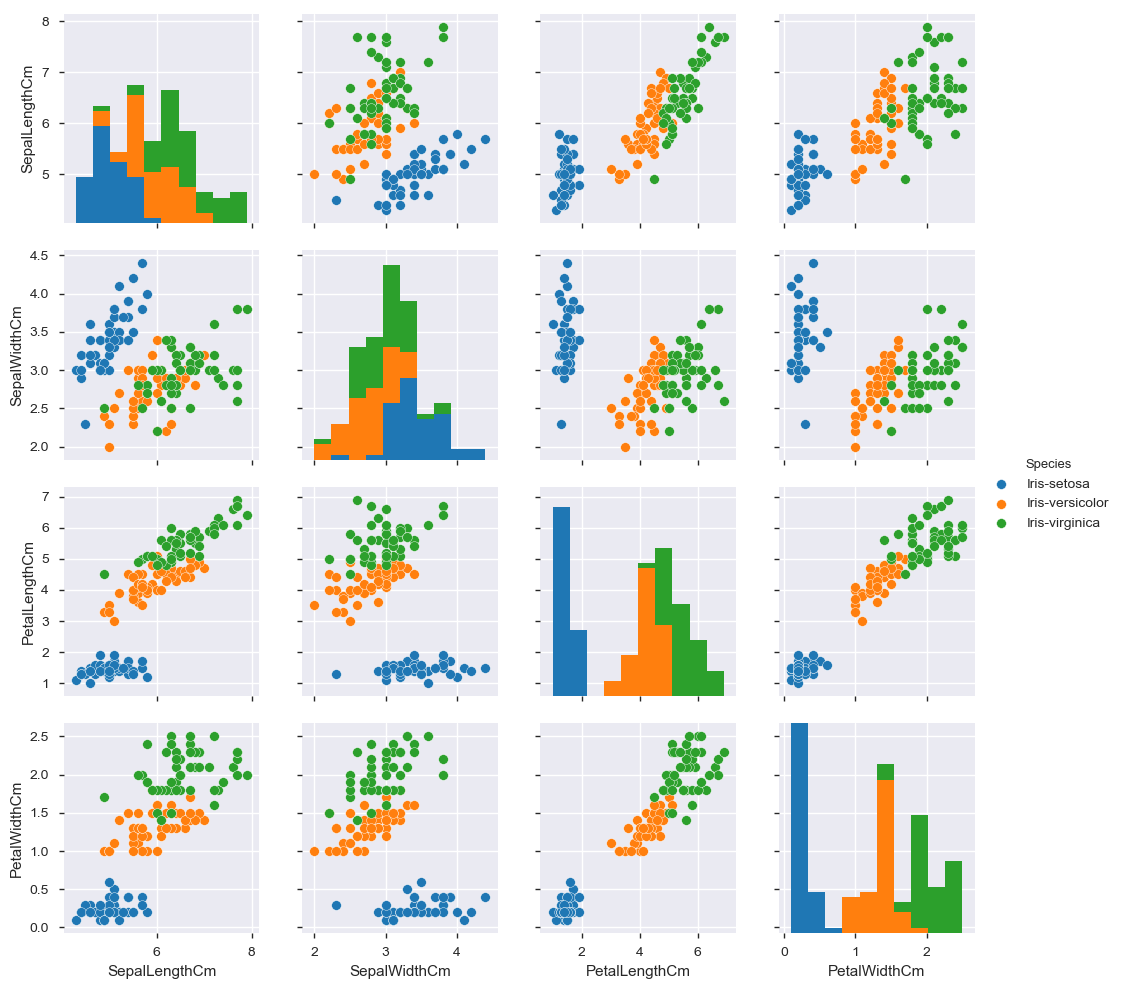

In [5]:
sns.pairplot(iris_data, vars=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], hue='Species')
# this plot gives relation between every variable in data to other.
# we can say that PetalLengthCm and PetalWidthCm are highly correlated to each other.

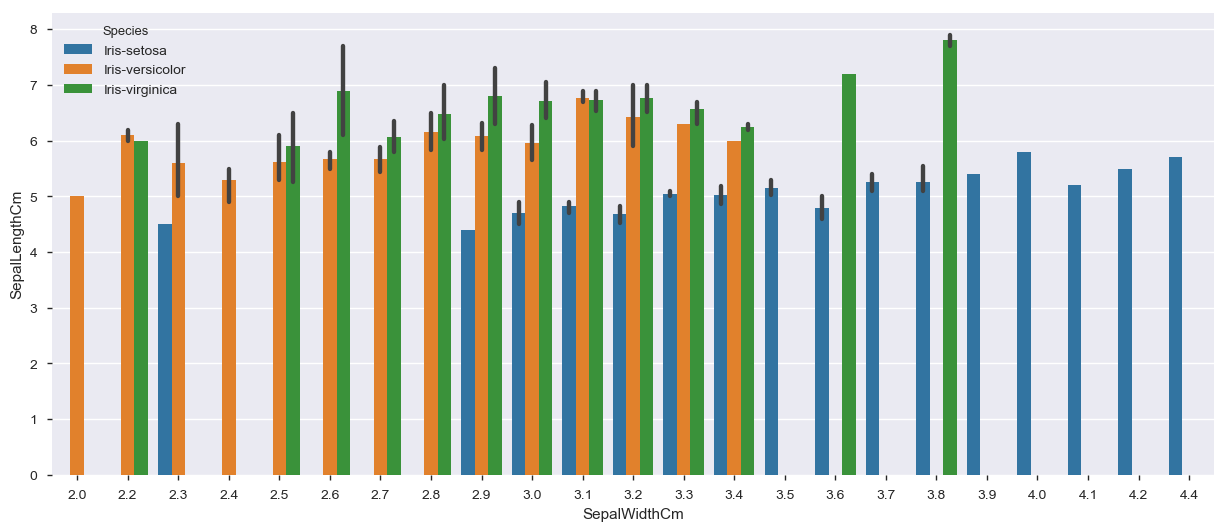

In [6]:
plt.rcParams['figure.figsize'] = (15, 6)
sns.barplot(y='SepalLengthCm', x='SepalWidthCm', data=iris_data, hue='Species')
# vericolor has smaller sepal width compared to setosa and virginica has moderate sepal width.
# on an average sepal length of virginica is more compared to other species.

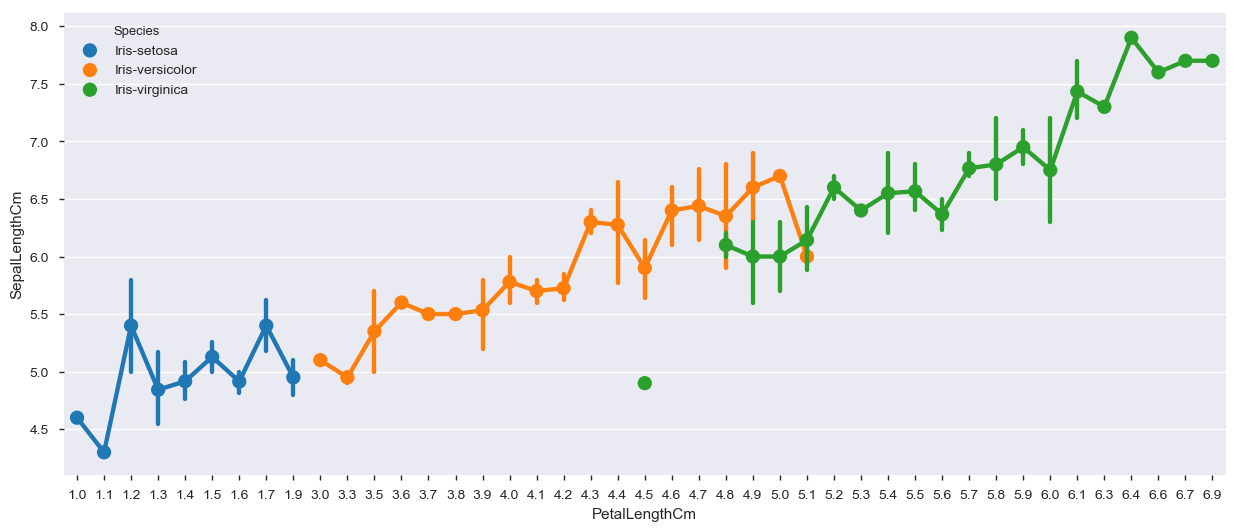

In [7]:
sns.pointplot(y='SepalLengthCm', x='PetalLengthCm', data=iris_data, hue='Species')
# petal length is more for virginica when compared to other species.
# setosa has least petal length among the three species.

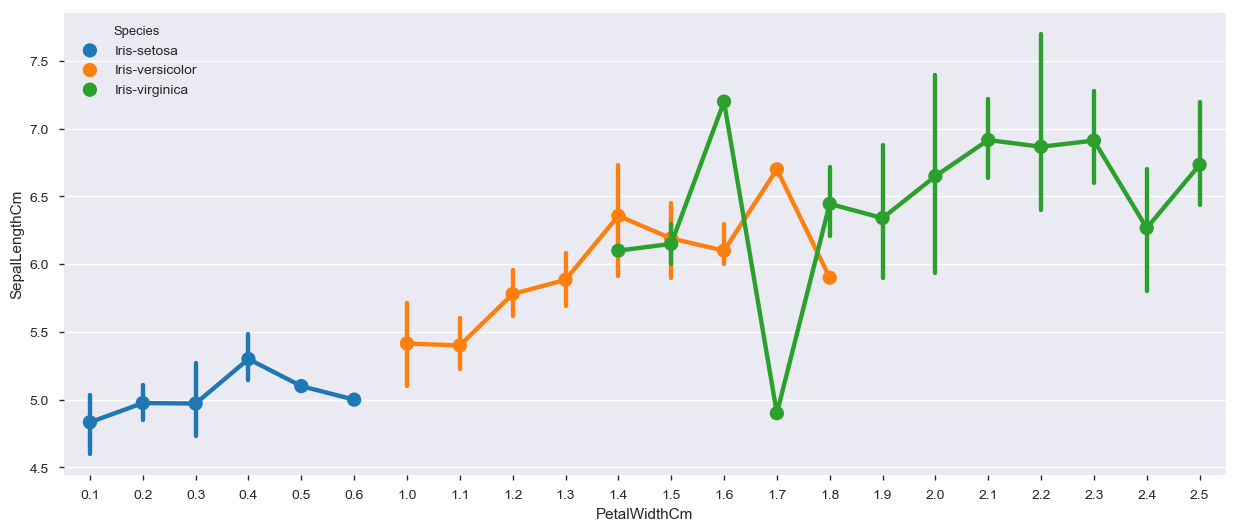

In [8]:
sns.pointplot(y='SepalLengthCm', x='PetalWidthCm', data=iris_data, hue='Species')
# petal width is more for virginica when compared to other species.
# setosa has least petal width among the three species.
# from all the above 2 graph including this, we can say that Sepal Length of virginica is more compared to others and setosa has
# less Sepal length on comparison, whatever may be the independent variable.

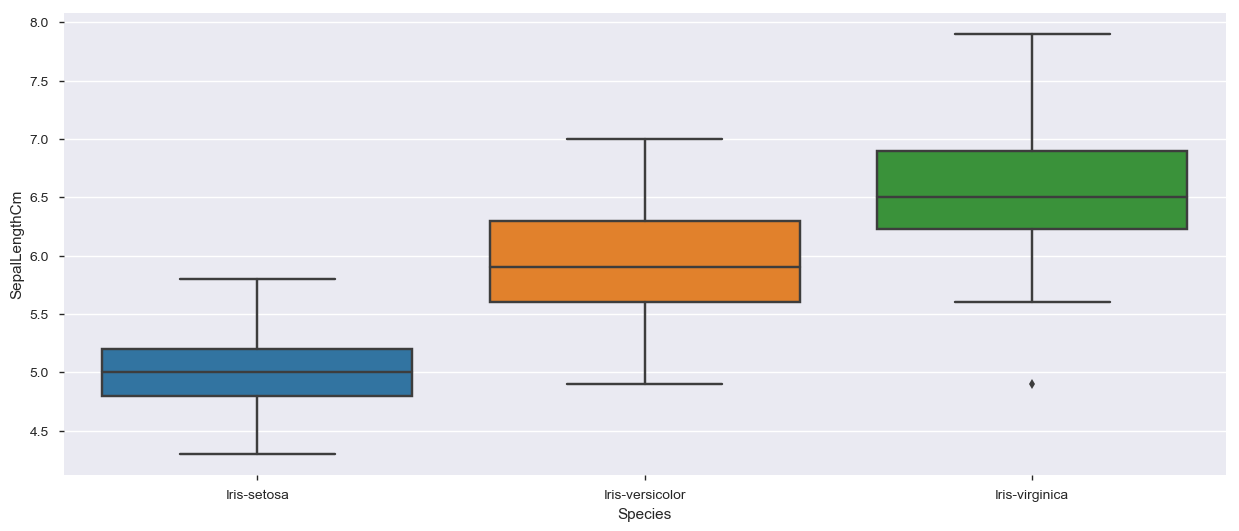

In [9]:
sns.boxplot(y='SepalLengthCm', x='Species', data=iris_data)
# we can say that Sepal Length of virginica is more compared to others and setosa has less Sepal length on comparison
# virginica has more spread i.e., variance is more.

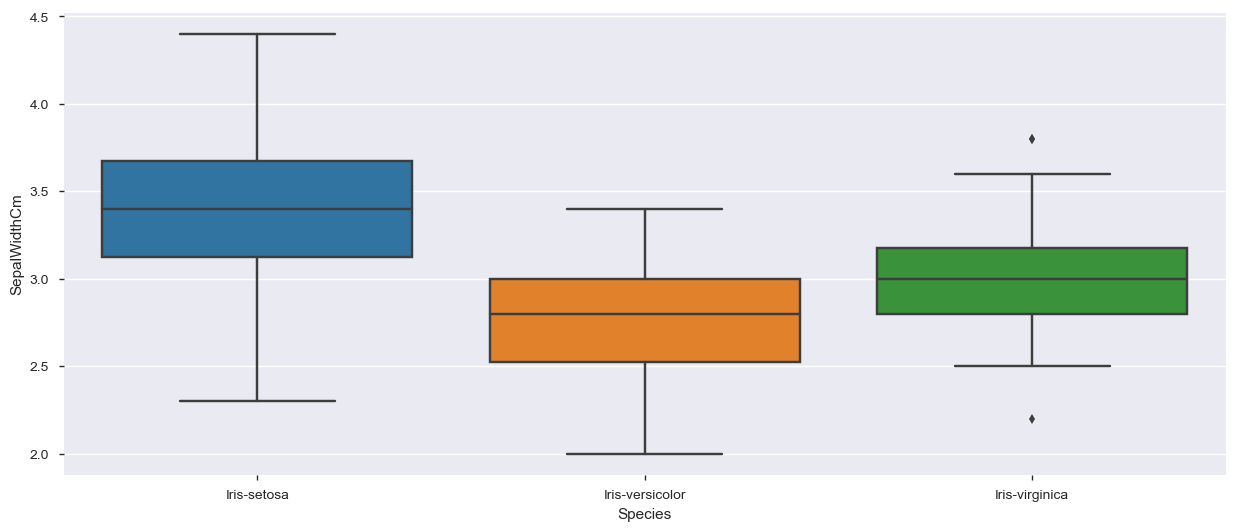

In [10]:
sns.boxplot(y='SepalWidthCm', x='Species', data=iris_data)
# setosa has more spread i.e., data ranges from 2.3 to 4.4 around
# sepal width of setosa is more.

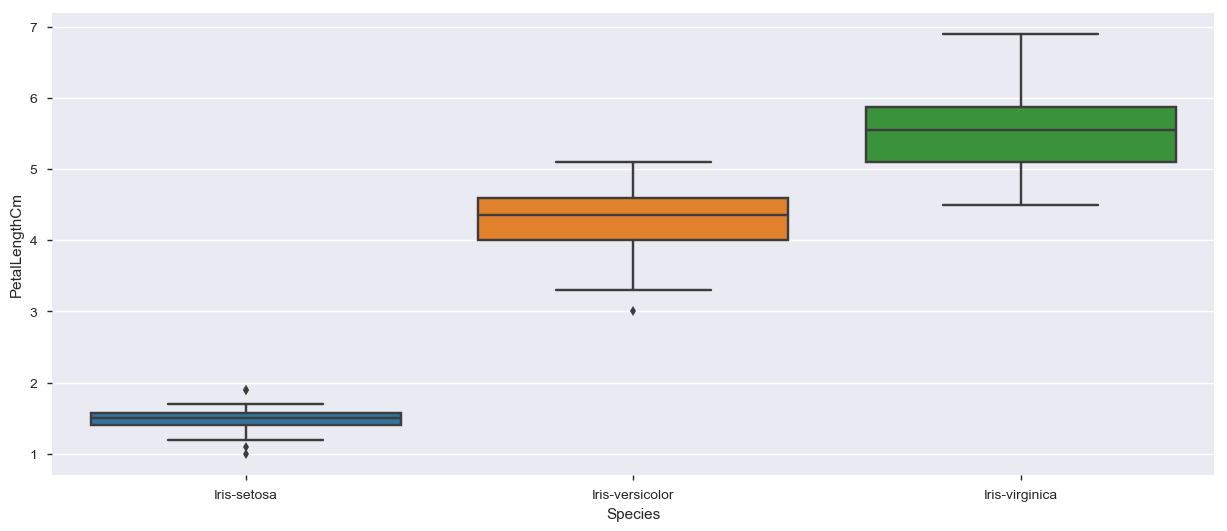

In [11]:
sns.boxplot(y='PetalLengthCm', x='Species', data=iris_data)
# setosa has very less spread i.e., data is more concentrated in a region. petal length of setosa is very less.
# virginica has larger petal length.

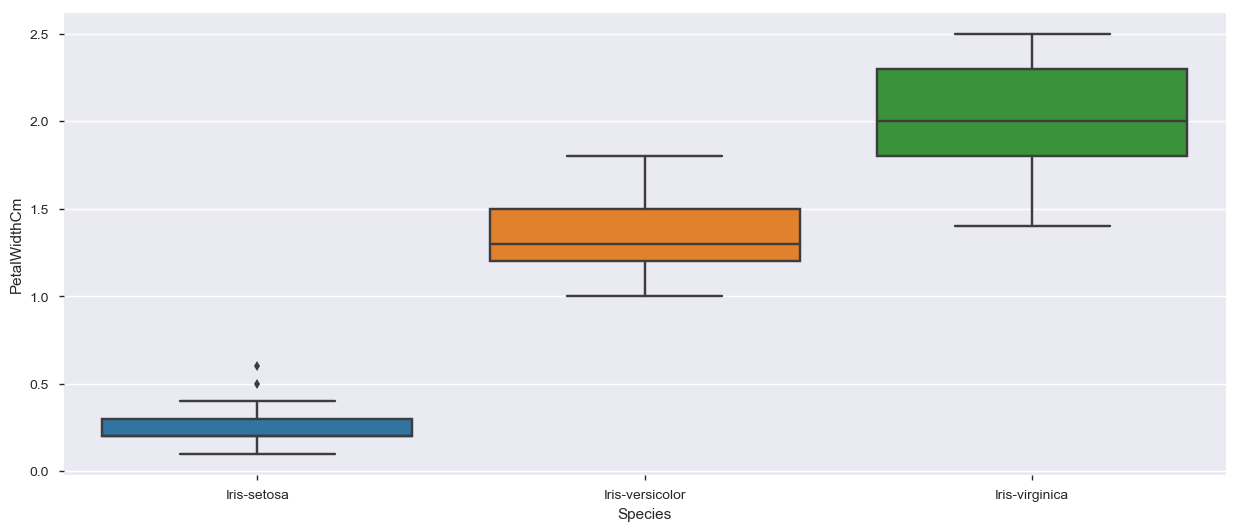

In [12]:
sns.boxplot(y='PetalWidthCm', x='Species', data=iris_data)
# setosa has very less spread i.e., data is more concentrated in a region. petal width of setosa is very less.
# virginica has larger petal width.
# from the box plots we can say that versicolor is moderately shaped species of flower.

In [13]:
iris_data.groupby('Species').mean()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,25.5,5.006,3.418,1.464,0.244
Iris-versicolor,75.5,5.936,2.770,4.260,1.326
Iris-virginica,125.5,6.588,2.974,5.552,2.026


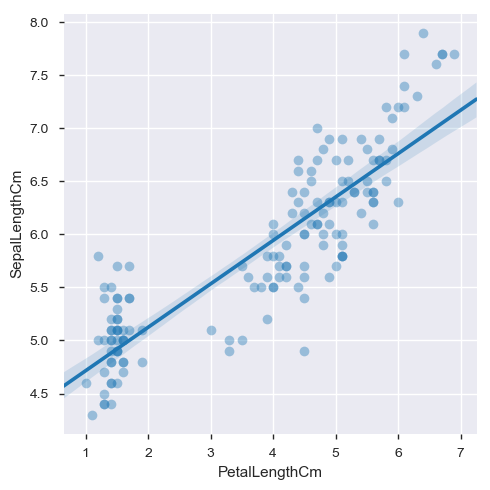

In [14]:
# Seaborn scatter plot with regression line
sns.lmplot(x='PetalLengthCm', y='SepalLengthCm', data=iris_data, aspect=1.0, scatter_kws={'alpha':0.4})

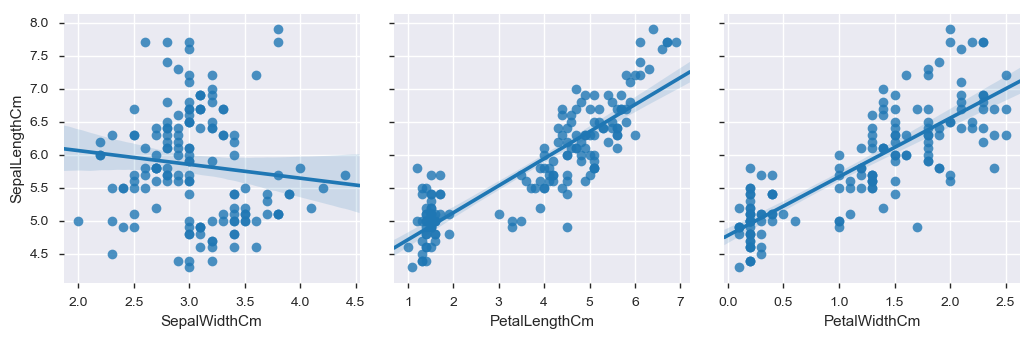

In [15]:
feature_cols = ['SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
sns.pairplot(iris_data, x_vars=feature_cols, y_vars='SepalLengthCm', kind='reg', size=3.5, aspect=1)
# we can see from the below graph that Sepal Length and Petal Length is linearly related.
# even Sepal Length and Petal Width is also linearly related.

In [16]:
# create X and y
X1 = iris_data[['PetalLengthCm']]
X2 = iris_data[['PetalWidthCm']]
X3 = iris_data[['SepalWidthCm']]
y = iris_data.SepalLengthCm

In [17]:
# import, instantiate, fit
linreg1 = LinearRegression()
linreg1.fit(X1, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
# print the coefficients
print (linreg1.intercept_)
print (linreg1.coef_)

4.305565456292049
[0.4091259]


In [19]:
# y = mx + c
print(linreg1.intercept_ + linreg1.coef_*2)
# use the predict method
linreg1.predict(2)

[5.12381725]


array([5.12381725])

In [20]:
linreg2 = LinearRegression()
linreg2.fit(X2, y)
print (linreg2.intercept_)
print (linreg2.coef_)
print(linreg2.intercept_ + linreg2.coef_*3)
linreg2.predict(3)

4.779493829588476
[0.88751905]
[7.44205099]


array([7.44205099])

In [21]:
linreg3 = LinearRegression()
linreg3.fit(X3, y)
print (linreg3.intercept_)
print (linreg3.coef_)
print(linreg3.intercept_ + linreg3.coef_*5)
linreg3.predict(5)

6.481223211459605
[-0.20887029]
[5.43687174]


array([5.43687174])

In [25]:
# pair the feature names with the coefficients
X = iris_data[feature_cols]
y = iris_data.SepalLengthCm
linreg = LinearRegression()
linreg.fit(X,y)
list(zip(feature_cols, linreg.coef_))

[('SepalWidthCm', 0.6548642427853524),
 ('PetalLengthCm', 0.7110629145526254),
 ('PetalWidthCm', -0.5625678605519044)]

Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **SepalWidthCm** is associated with a **SepalLengthCm increase of 0.65cm**.
- Holding all other features fixed, a 1 unit increase in **PetalLengthCm** is associated with a **SepalLengthCm increase of 0.711cm**.
- Holding all other features fixed, a 1 unit increase in **PetalWidthCm** is associated with a **SepalLengthCm decreases of -0.56cm**.